In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import math


In [ ]:
#initialization
n = 50
dx = 1/n
dt = (dx**2)/4 #this is too make sure that I am working with stable initial conditions with varying n
print(f'dt = {dt}')
x = np.linspace(0,1,n+1)
D = 1
print(dt*D/(dx**2)) # if this is under 1 the scheme is stable

dt = 0.0001
0.25


In [21]:
def next_step_1(matrix, dt=dt, dx=dx, D=D):
    cons = dt*D/(dx**2)
    if cons > 1:
        return r"$\frac{4\delta t D}{\delta x^2} \geq 1 \implies$ scheme is unstable"
    else:
        n = len(matrix)
        next_matrix = np.copy(matrix)
        
        for j in range (1, n-1):
            
            # west boundary case where x = 0:
            next_matrix[j,0] = matrix[j,0] + cons * (matrix[j,1] + \
            matrix[j,-2] + matrix[j+1,0] + matrix[j-1,0] - 4 * matrix[j,0])

            # non-boundary case 
            for i in range (1, n-1):
                next_matrix[j,i] = matrix[j,i] + cons * (matrix[j,i+1] + \
                matrix[j,i-1] + matrix[j+1,i] + matrix[j-1,i] - 4 * matrix[j,i])

            # east boundary case where x = n:
            next_matrix[j,-1] = matrix[j,-1] + cons * (matrix[j,1] + \
            matrix[j,-2] + matrix[j+1,-1] + matrix[j-1,-1] - 4 * matrix[j,-1])
            
        return next_matrix

The following kernel produces a colorcoded simulation for concentration diffusion based on the above initialized parameters and function for updating our $N\times N$ domain of intervals of x and y over time. (~ 2m 9.5s run time, feel free to reduce the number of frames if needed - 100 frames = ~14 secs )

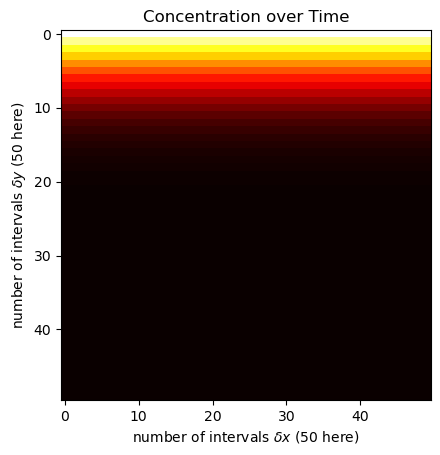

In [23]:
domain = np.zeros((n ,n))
domain[0, :] = 1

fig, ax = plt.subplots()
im = ax.imshow(domain, cmap='hot', animated=True)

ax.set_xlabel(fr"number of intervals $\delta x$ ({n} here)")
ax.set_ylabel(fr"number of intervals $\delta y$ ({n} here)")
ax.set_title("Concentration over Time")

def update(frame):
    global domain
    domain = next_step_1(domain)
    im.set_array(domain)
    return [im]


ani = animation.FuncAnimation(fig, update, frames=1000, interval=50, blit=False)

HTML(ani.to_jshtml())

In the following kernel, I pull status from my concentration diffusion simulation at intervals 10, 100, 1000, 10000 of times steps $\delta t = .0001$ and plot them alongside one-another. (run time = ~1m 7.9s) 

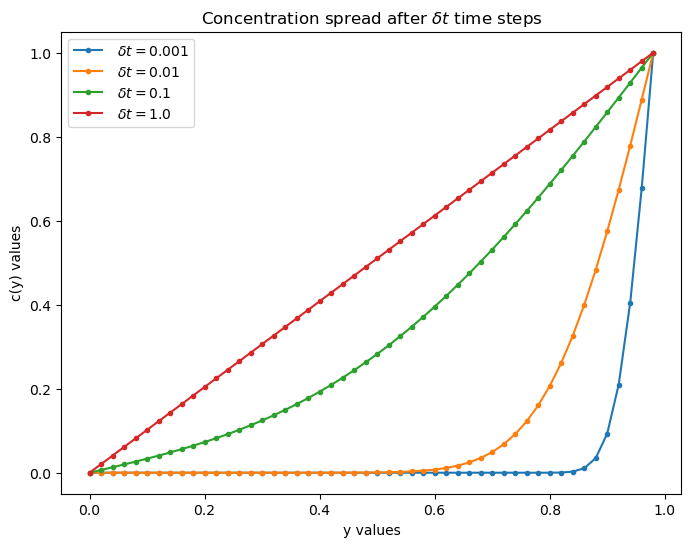

In [24]:
#intialize
c_y = [] #concentration at y
frames_to_save = [10, 100, 1000, 10000]
domain = np.zeros((n ,n))
domain[0, :] = 1
y = [] #y values, tracked for ploting
for i in range(n):
    y.append(dx*i)
dt_ = []

#run the diffusion while saving our four cases 
for i in range(10001):
    domain = next_step_1(domain)
    if i in frames_to_save:
        c_y.append(domain[::-1, 0])
        dt_.append(dt * i)

#plot the resulting data
plt.figure(figsize=(8, 6))

for idx, _ in enumerate(frames_to_save):
    plt.plot(y, c_y[idx], label=fr" $\delta t =${dt_[idx]}", linestyle='-', marker='o', markersize=3)

plt.xlabel("y values")
plt.ylabel("c(y) values")
plt.title(r"Concentration spread after $\delta t$ time steps")
plt.legend()
plt.show()